# Description of the Notebook

In [1]:
import roundtrip_path_planner
import IPTestSuiteSS2023

# Definition StartPos, TargetPosList, Environment

Aufruf des Benchmarks, der Startpos und TargetPosList (wie im IP-X-0-Automated_PlannerTest.ipynb)

In [2]:
import importlib
importlib.reload(roundtrip_path_planner)

<module 'roundtrip_path_planner' from '/home/moritz_s/Documents/RKIM_1/Roboterprogrammierung/Projektarbeit_Robot_Path_Planning/Roundtrip_Path_Planning/roundtrip_path_planner/roundtrip_path_planner.py'>

astar [<class 'IPAStar.AStar'>, {'heuristic': 'euclidean', 'w': 0.5}, <function aStarVisualize at 0x781dbc21ee80>]
Planning: astar - Trap
Usedstart: [10, 15]
Pastgoals: [[12, 6], [10, 3], [8, 4]]
tmp_1: [[10, 15]]
tmp_2: [[12, 6]]
PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR 
Exception details: cannot access local variable 'Env_Limits' where it is not associated with a value
New Usedstart: [12, 6]
Usedstart: [12, 6]
Pastgoals: [[12, 6], [10, 3], [8, 4]]
tmp_1: [[12, 6]]
tmp_2: [[10, 3]]
PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR 
Exception details: cannot access local variable 'Env_Limits' where it is not associated with a value
New Usedstart: [10, 3]
Usedstart: [10, 3]
Pastgoals: [[12, 6], [10, 3], [8, 4]]
tmp_1: [[10, 3]]
tmp_2: [[8, 4]]
PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR 
Exception details: cannot access local variable 'Env_Limits' where it is not associated with a value
New Usedstart: [8, 4]
Resultlist solution: ['-10-15-', '-11-15-', '-12-15-', '-13-15-', '

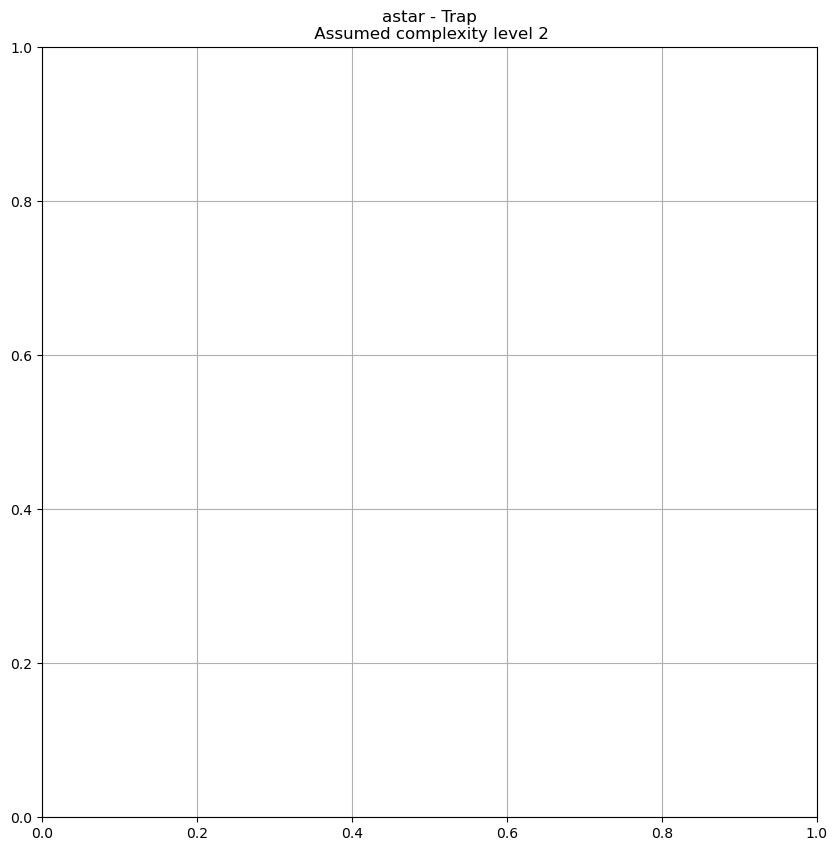

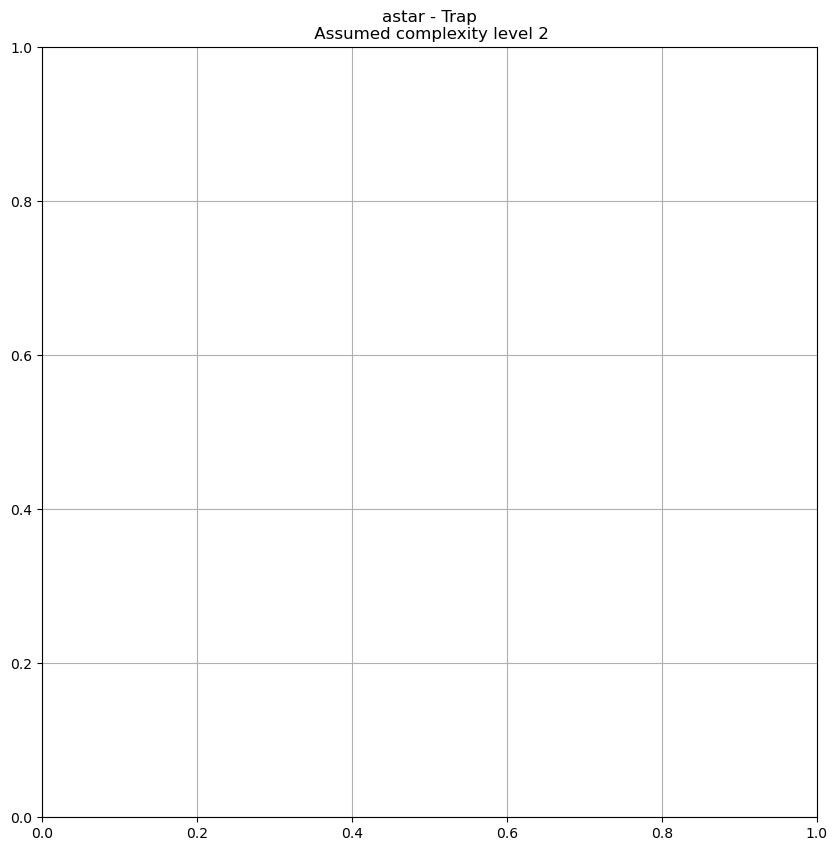

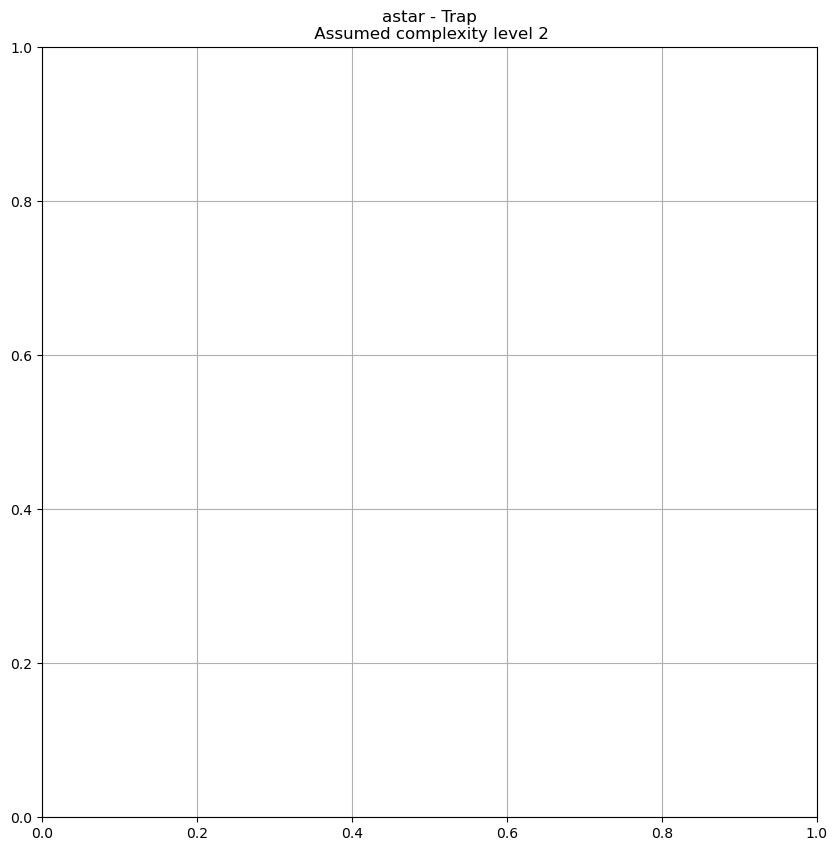

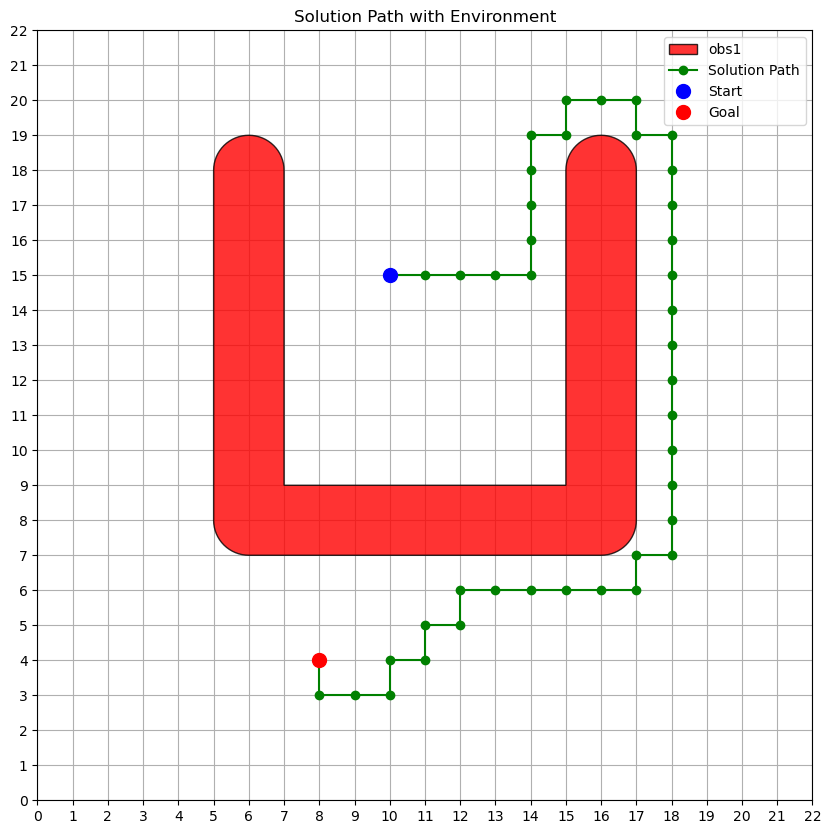

In [3]:
######
# Test
######

fullBenchList = IPTestSuiteSS2023.benchList
Environment_Test = fullBenchList[0]

test_startlist =[[10,15]] 
test_goallist = [[10,3], [12,6], [8,4]]

# Planen = roundtrip_path_planner.Roundtrip_Path_Planner(Environment_Test.startList, Environment_Test.goalList, Environment_Test ,"basePRM")
Planen = roundtrip_path_planner.Roundtrip_Path_Planner(test_startlist, test_goallist, Environment_Test ,"visibilityPRM_custom")
Planen.plan()
